# Tarea 3 - Reticulados
Para el domingo 5 de abril a las 23:59

## Código de Honor
Me comprometo a hacer esta tarea por mi cuenta y por mis propios medios:

In [3]:
firma = 'mi nombre aqui'
print(firma)

mi nombre aqui


Completar este programa para determinar las fuerzas y reacciones en un
reticulado segun lo visto en clases. La tarea sera evaluada con un
reticulado arbitrario.

Bonus: se premiara con 0.3 puntos del curso al que incorpore en su codigo alguna
forma de mostrar los resultados en un grafico. Puede ser distintos colores, o con numeros.
Queda a discreción del profesor la cantidad del puntaje asignado, segun la calidad del gráfico.

In [4]:
from Truss import * # Importa el modulo con las funciones
filename='truss.in'; #nombre del archivo con la informacion del reticulado

In [5]:
tr=Truss(filename)

[[0. 0.]
 [1. 0.]
 [2. 0.]
 [0. 1.]
 [1. 1.]]
[[0 1]
 [1 2]
 [0 3]
 [3 1]
 [1 4]
 [4 2]
 [3 4]]
[[0 1 0]
 [0 0 1]
 [3 1 0]]
[[   2.    0. -100.]
 [   3.    0. -300.]]


Se genera un objeto `Truss`, que tiene los siguientes atributos:

- `tr.nodes [nro de nodos,2]`: tiene la posicion X,Y de cada nodo en el mismo
orden en que fueron especificados en el archivo.
- `tr.bars [nro de barras,2]`: contiene el numero de cada nodo que esta
presente en la barra
- `tr.reac [nro de reacciones, 3]`: en la primera columna tiene los nodos en los
que esta aplicada la reaccion. La 2da y 3ra corresponden a un vector
unitario especificando la direccion de la reaccion. El número de nodo en que está aplicada la fuerza puede venir en `float`. Hay que convertirlo a `int` para usarlo como índice: `i = int(f)`.
- `tr.force [nro de fuerzas,3]`: en la primera columna tiene los nodos en los
que esta aplicada la fuerza. La 2da y 3ra corresponden a un vector
especificando la fuerza. Ojo!! El número de nodo en que está aplicada la fuerza puede venir en `float`. Hay que convertirlo a `int` para usarlo como índice: `i = int(f)`.

Además cuenta con las funciones:

- `tr.plot`: dibuja el reticulado. En negro se grafican las restricciones
en rojo las fuerzas. Los vectores estan dibujados de manera que siempre apuntan al nodo.
- `tr.X(i,j)` retorna el coeficiente X.
- `tr.Y(i,j)` retorna el coeficiente Y.

$X(i,j,k) = (x_i - x_j)/l_k$

In [6]:
tr.X(1,2) 

-1.0

[0.]
[0.]


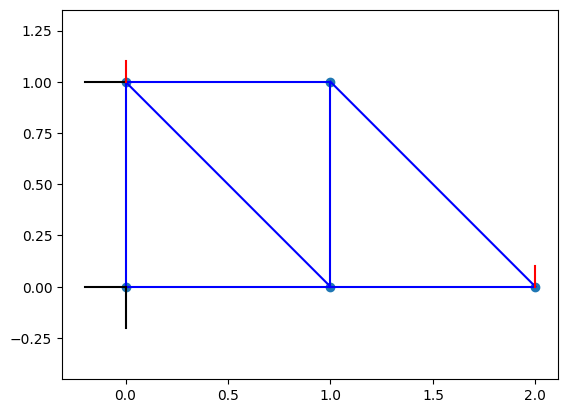

In [7]:
tr.plot()

## Caso isoestático
Calcule las fuerzas y reacciones para un reticulado isoestático según lo visto en clases

In [8]:
tr=Truss(filename)

A=np.zeros((len(tr.bars)+len(tr.reac),len(tr.bars)+len(tr.reac)))
f=np.zeros(len(tr.bars)+len(tr.reac))

nb=len(tr.bars)

# Aquí va su desarrollo.

A[0,1] = tr.X(1,2)
print(A)

tr.X(1,2)

[[0. 0.]
 [1. 0.]
 [2. 0.]
 [0. 1.]
 [1. 1.]]
[[0 1]
 [1 2]
 [0 3]
 [3 1]
 [1 4]
 [4 2]
 [3 4]]
[[0 1 0]
 [0 0 1]
 [3 1 0]]
[[   2.    0. -100.]
 [   3.    0. -300.]]
[[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [9]:
F=np.linalg.solve(A,f) # para resolver. Llamar F al vector que contiene las fuerzas

LinAlgError: Singular matrix

In [ ]:
for i in range(nb):
    print('Fuerza en la barra %i:' % i, F[i])
    
for i in range(len(tr.reac)):
    print('Reacción en nodo %i, dirección [%d, %d]:' % (tr.reac[i,0], tr.reac[i,1], tr.reac[i,2]), F[i + nb])